In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
import pandas as pd
from pandas import DataFrame

In [3]:
import sys
print(sys.path)

['', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python27.zip', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/plat-darwin', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/plat-mac', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/lib-tk', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/lib-old', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/lib-dynload', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/cycler-0.10.0-py2.7.egg', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/mccabe-0.6.1-py2.7.egg', '/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/IPython/extensions', '/Users/perdue/.ipython']


In [4]:
sys.path.append('/Users/perdue/Documents/MINERvA/AI/ANNMINERvA')
from evtid_utils import decode_eventid

In [5]:
DIR_PATH = '/Users/perdue/Documents/MINERvA/AI/hdf5/'
f = h5py.File(DIR_PATH + 'hadmultkineimgs_127x94_me1Amc_tiny.hdf5', 'r')

for group in f:
    for dset in f[group]:
        print '{:>10}/{:<16} - {:>8} {}'.format(group, dset, np.dtype(f[group][dset]), np.shape(f[group][dset]))

event_data/eventids         -   uint64 (35, 1)
event_data/eventids_a       -   uint32 (35, 1)
event_data/eventids_b       -   uint32 (35, 1)
event_data/planecodes       -   uint16 (35, 1)
event_data/segments         -    uint8 (35, 1)
event_data/zs               -  float32 (35, 1)
  gen_data/Q2               -  float32 (35, 1)
  gen_data/W                -  float32 (35, 1)
  gen_data/current          -   uint32 (35, 1)
  gen_data/int_type         -   uint32 (35, 1)
  gen_data/targetZ          -   uint32 (35, 1)
  gen_data/x                -  float32 (35, 1)
  gen_data/y                -  float32 (35, 1)
hadro_data/esum_chgdkaons   -  float32 (35, 1)
hadro_data/esum_chgdpions   -  float32 (35, 1)
hadro_data/esum_hadmultmeas -  float32 (35, 1)
hadro_data/esum_neutpions   -  float32 (35, 1)
hadro_data/esum_neutrons    -  float32 (35, 1)
hadro_data/esum_others      -  float32 (35, 1)
hadro_data/esum_protons     -  float32 (35, 1)
hadro_data/n_chgdkaons      -   uint32 (35, 1)
hadro_data/n_

In [6]:
data = {'n-protons': f['hadro_data']['n_protons'][:,0],
        'n-pions': f['hadro_data']['n_chgdpions'][:,0],
        'n-kaons': f['hadro_data']['n_chgdkaons'][:,0],
        'n-hadmultmeas': f['hadro_data']['n_hadmultmeas'][:,0]}
df = DataFrame(data)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
n-hadmultmeas    35 non-null uint32
n-kaons          35 non-null uint32
n-pions          35 non-null uint32
n-protons        35 non-null uint32
dtypes: uint32(4)
memory usage: 632.0 bytes


In [8]:
min_h, max_h = np.min(df['n-hadmultmeas']), np.max(df['n-hadmultmeas'])
print min_h, max_h

0 7


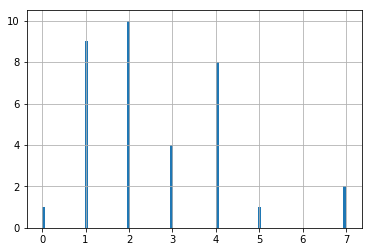

In [9]:
df['n-hadmultmeas'].hist(bins=100)

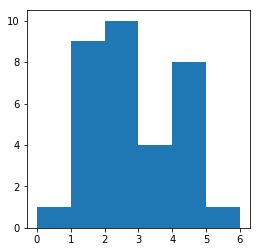

In [10]:
fig = plt.figure(figsize=(4, 4))
n, bins, patches = plt.hist(f['hadro_data']['n_hadmultmeas'][:,0], bins=np.arange(max_h))
#fig.savefig('n-hadmultmeas_20160503.pdf')

In [11]:
ntot = np.sum(n)
print('n total = {}'.format(ntot))

for i in range(6):
    print('{} hadrons sum: {}'.format(i, n[i]))
    
print('6+ hadrons sum: {}'.format(sum(n[6:])))
    
for i in range(6):
    print('{} hadrons fraction: {}'.format(i, n[i] / ntot))
    
print('6+ hadrons fraction: {}'.format(sum(n[6:]) / ntot))

n total = 33.0
0 hadrons sum: 1.0
1 hadrons sum: 9.0
2 hadrons sum: 10.0
3 hadrons sum: 4.0
4 hadrons sum: 8.0
5 hadrons sum: 1.0
6+ hadrons sum: 0
0 hadrons fraction: 0.030303030303
1 hadrons fraction: 0.272727272727
2 hadrons fraction: 0.30303030303
3 hadrons fraction: 0.121212121212
4 hadrons fraction: 0.242424242424
5 hadrons fraction: 0.030303030303
6+ hadrons fraction: 0.0


Text(0,0.5,u'n_others')

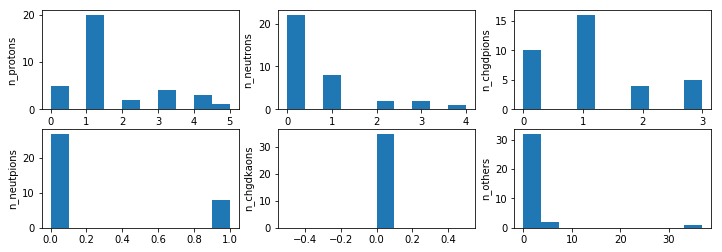

In [12]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(2, 3)

ax = plt.subplot(gs[0])
plt.hist(f['hadro_data']['n_protons'][:, 0])
plt.ylabel('n_protons')

ax = plt.subplot(gs[1])
plt.hist(f['hadro_data']['n_neutrons'][:, 0])
plt.ylabel('n_neutrons')

ax = plt.subplot(gs[2])
plt.hist(f['hadro_data']['n_chgdpions'][:, 0])
plt.ylabel('n_chgdpions')

ax = plt.subplot(gs[3])
plt.hist(f['hadro_data']['n_neutpions'][:, 0])
plt.ylabel('n_neutpions')

ax = plt.subplot(gs[4])
plt.hist(f['hadro_data']['n_chgdkaons'][:, 0])
plt.ylabel('n_chgdkaons')

ax = plt.subplot(gs[5])
plt.hist(f['hadro_data']['n_others'][:, 0])
plt.ylabel('n_others')

#plt.yscale('log')
#fig.savefig('n20160503.pdf')

Text(0,0.5,u'n_sum')

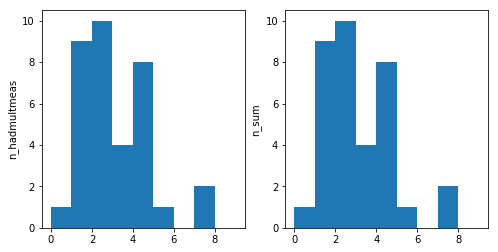

In [13]:
#(df['n-protons'] + df['n-pions'] + df['n-kaons']).hist()
fig = plt.figure(figsize=(8, 4))
gs = plt.GridSpec(1, 2)

ax = plt.subplot(gs[0])
plt.hist(f['hadro_data']['n_hadmultmeas'][:, 0], np.arange(10))
plt.ylabel('n_hadmultmeas')

ax = plt.subplot(gs[1])
plt.hist(f['hadro_data']['n_protons'][:, 0] + f['hadro_data']['n_chgdpions'][:, 0] + f['hadro_data']['n_chgdkaons'][:, 0], np.arange(10))
plt.ylabel('n_sum')

In [14]:
for i in range(35):
    n_p, n_cp, n_ck = f['hadro_data']['n_protons'][i, 0], \
        f['hadro_data']['n_chgdpions'][i, 0], \
        f['hadro_data']['n_chgdkaons'][i, 0]
    n_hm = f['hadro_data']['n_hadmultmeas'][i, 0]
    if n_p + n_cp + n_ck != n_hm:
        print(decode_eventid(f['event_data']['eventids'][i, 0]), n_p + n_cp + n_ck, n_hm)

Text(0,0.5,u'n_taus')

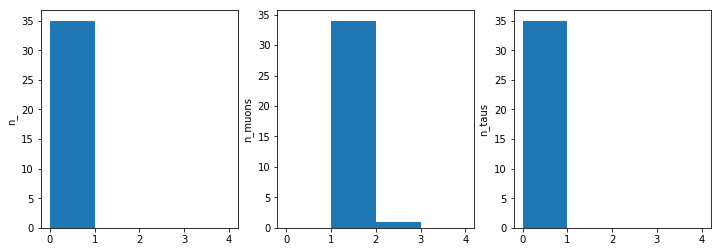

In [15]:
fig = plt.figure(figsize=(12,4))
gs = plt.GridSpec(1, 3)

ax = plt.subplot(gs[0])
plt.hist(f['lepto_data']['n_electrons'][:, 0], np.arange(5))
plt.ylabel('n_')

ax = plt.subplot(gs[1])
plt.hist(f['lepto_data']['n_muons'][:, 0], np.arange(5))
plt.ylabel('n_muons')

ax = plt.subplot(gs[2])
plt.hist(f['lepto_data']['n_taus'][:, 0], np.arange(5))
plt.ylabel('n_taus')

In [16]:
f.close()